In [ ]:
'''
 @file Campbell_HW4.ipynb
 @author Kiersten Campbell (kscamp3@emory.edu)
 @version 0.1
 @date 2023-11-05
 
 Environment object to represent a community in an agent-based model. 
 An environment is grid containing multiple agents. 
 In a simulation, the environment is updated iteratively to reflect interactions between agents
'''

In [2]:
from environment import Environment
from agent import Agent
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# Visualize results from Environment simulation results
def visualize_simulation(results, time, axis = None, legend = 'auto'):
    results = pd.DataFrame(results)
    
    # Since results contain counter objects, some status keys are not present in counter dict if agent count = 0
    # manually refill missing keys with 0 counts
    results.fillna(0, inplace=True)
    results = results.transpose()
    
    time = [i for i in range(0, time)]
    sns.lineplot(x = time, y = results['S'], label = "S", ax = axis, legend = legend)
    sns.lineplot(x = time, y = results['I'], label = "I", ax = axis, legend = legend)
    sns.lineplot(x = time, y = results['R'], label = "R", ax = axis, legend = legend)

Text(0.5, 1.0, 'Agent-Based Model with p = 0.05 and q = 0.02')

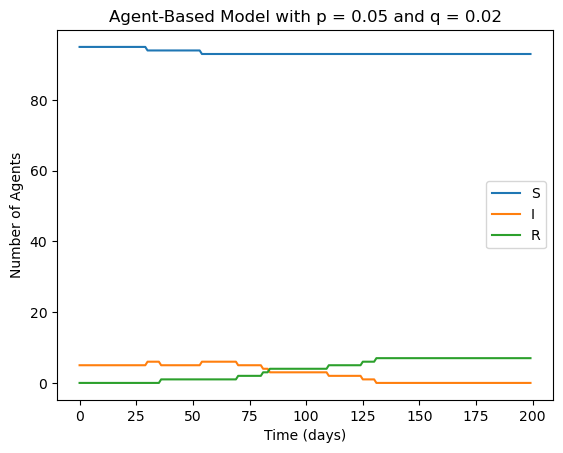

In [10]:
# Define environment & run simulation of 200 time steps
size = 50
p = 0.05
q = 0.02

e = Environment(size, p, q)
e.populate_all(n_sus = 95, n_inf = 5, n_recov = 0)
results = e.run_simulation(200)
visualize_simulation(results, 200)
#plt.ylim(0, 100)
plt.xlabel("Time (days)")
plt.ylabel("Number of Agents")
plt.title("Agent-Based Model with p = 0.05 and q = 0.02")

Text(0.02, 0.5, 'Number of Agents')

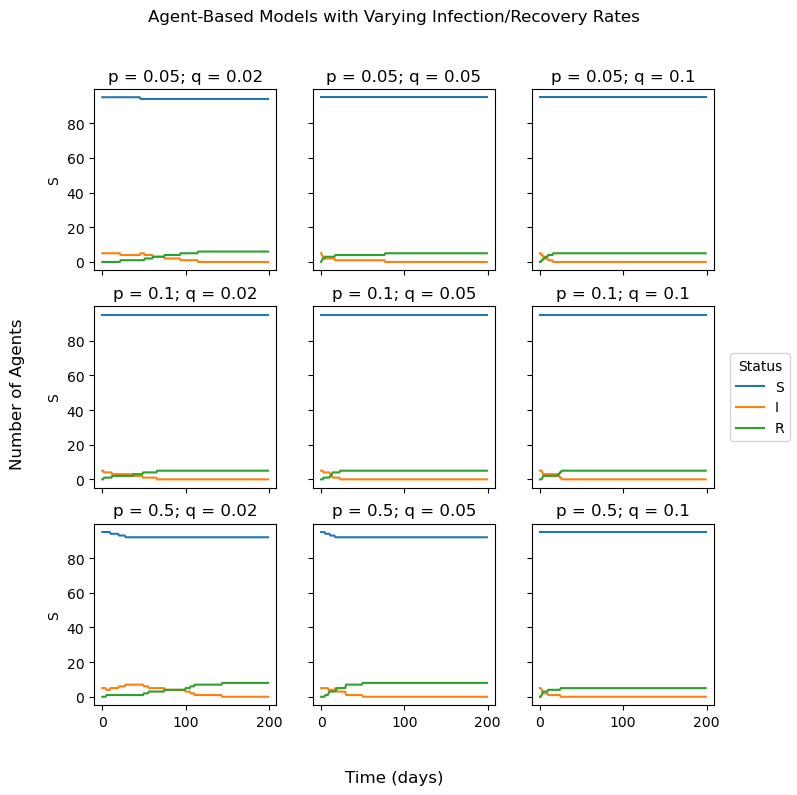

In [16]:
# Simulate model with differing recovery & infection rates to assess impact on pandemic dynamics
ps = [0.05, 0.1, 0.5]
qs = [0.02, 0.05, 0.1]

fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(8,8))

for i in range(0,3):
    for j in range(0,3):
        
        p = ps[i]
        q = qs[j]
        
        e = Environment(size, p, q)
        e.populate_all(n_sus = 95, n_inf = 5, n_recov = 0)
        results = e.run_simulation(200)
        visualize_simulation(results, 200, ax[i][j], legend = False)
        
        ax[i][j].title.set_text("p = {0}; q = {1}".format(p, q))

# Add global figure annotations
h, l = ax[0][1].get_legend_handles_labels()
#fig.subplots_adjust(hspace=0.75)
plt.figlegend(h,l, loc = 'center right', title = "Status")
fig.suptitle("Agent-Based Models with Varying Infection/Recovery Rates")
fig.supxlabel("Time (days)")
fig.supylabel("Number of Agents")